In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['figure.dpi'] = 200


In [15]:
simdirs = ["simulations/" + str(x) for x in range(1,91)]

In [18]:
N = 200
params_list = []
lattices_list = []
for simdir in simdirs:
    try:
        lattice_raw = np.genfromtxt(simdir+"/results/restart.SK2D_200.out")
        lattices_list.append(np.reshape(lattice_raw[:,4:], (N, N, 3)))
        params_list.append(np.genfromtxt(simdir+"/params")) # D B

    except:
        pass
lattices_list = np.array(lattices_list)
params_list = np.array(params_list)

In [19]:
lattices_list.shape

(63, 200, 200, 3)

In [27]:
def plot_sim(i):
    plt.imshow(lattices_list[i, :, :, 2], vmin=-1, vmax=1)
    plt.title("D={},B={}".format(params_list[i,0], params_list[i,1]))
    plt.colorbar()

In [44]:
def get_mag(lattice):
    return np.sum(lattice[:,:,2])

ValueError: 'c' argument has 63 elements, which is inconsistent with 'x' and 'y' with size 90.

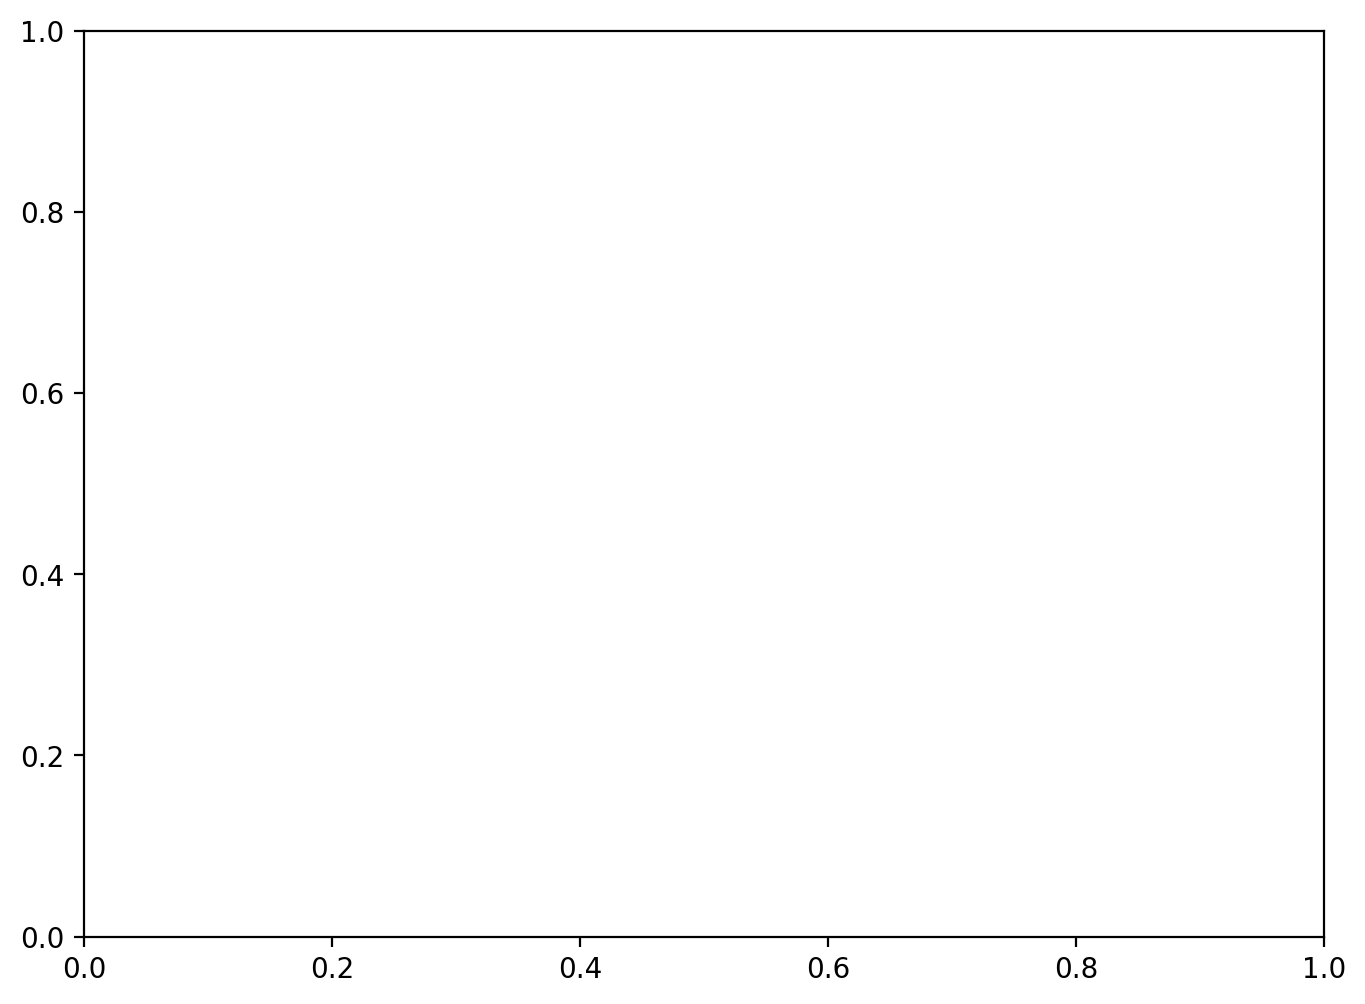

In [49]:
mag = [get_mag(l) for l in lattices_list]    

plt.scatter(params_list[:,0], params_list[:,1], c=mag, cmap="plasma", marker="o", s=60)


In [ ]:
np.savez("heat_bath.npz", lattices=lattices_list, params=params_list)